# Exercise 06 - Data Fitting 1 (75 + 35 points)

In this exercise you will implement and employ linear and non-linear methods of data fitting to the task of camera response curve estimation. 
The camera response function represents the relation between scene irradiance to image brightness (pixel intensities). In a previous exercise we have already applied a non-parametric model to recover the camera response function for HDR imaging. In this exercise you will apply some of the data fitting methods introduced in the lecture to find model parameters $a$ that, given the irradiance, explain our observed brightness values best.

In [2]:
# Overall imports.
%matplotlib widget
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
import scipy
from skimage.metrics import mean_squared_error
from tqdm.notebook import tqdm

## 1. Linear Regression on Camera Response Estimation (75 points)
The basic idea is to find model parameters $a$ for a function $f$ which describe the data as well as possible, ideally also generalizing over new, unseen data.
By running the next cell you can plot the available data which consists of a set of brightness values measured at a given irradiance on the sensor. There has been some noise added to simulate data that you would get from a real measurement process.

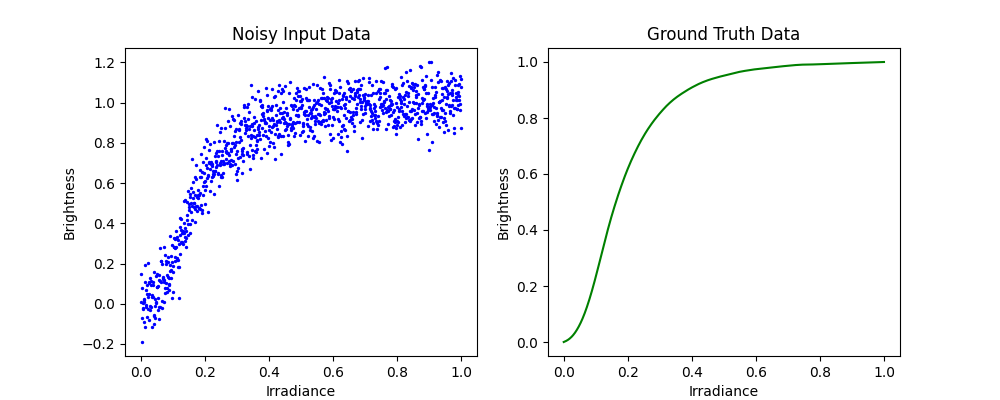

In [3]:
# Add additional imports.
import scipy.io
import scipy.optimize

# Load measured camera curve data.
cam_data = scipy.io.loadmat("camCurve.mat")
irradiance = cam_data["I"][0].astype(np.float32)
brightness = cam_data["B"][0].astype(np.float32)

# Add some noise.
rs = RandomState(MT19937(SeedSequence(121336779)))
brightness += rs.normal(0, 0.08, brightness.shape)

# Plot data.
fig = plt.figure(figsize=(10, 4))
ax = fig.subplots(1, 2)
ax[0].set_title("Noisy Input Data")
ax[0].scatter(irradiance, brightness, color="b", s=2)
ax[0].set_xlabel("Irradiance")
ax[0].set_ylabel("Brightness")
ax[1].set_title("Ground Truth Data")
ax[1].plot(irradiance, cam_data["B"][0].astype(np.float32), color="g")
ax[1].set_xlabel("Irradiance")
ax[1].set_ylabel("Brightness")
plt.show()

### 1.1 (30)
Your first task is to implement the gradient descent algorithm as the function `graddesc(a, b, tolerance, iterations, step_size)`. 

#### a) (10)
The error function to be optimized is $E = \|b-Ax\|_2^2$ with $A$ being your design matrix including the measurements, $b$ your observations and $x$ the parameters to be optimized. As a first step calculate the gradient analytically. 

_Hint_: You can put your derivation of the first order derivative of the error function in a Markdown cell using the math environment inside the notebook. It is also fine to include a scan, photo or pdf document. You might find the identities listed at [Wikipedia](https://en.wikipedia.org/wiki/Matrix_calculus) useful for the derivation. Keep in mind that $E(x)$ is a scalar function. If you find yourself stuck on this exercise, do the other exercises first.

#### b) (20)
Finish your implementation and try to fit a polynomial of order 4 and 7 to the provided data of __irradiance__ and __brightness__.


In [ ]:
def graddesc(a: np.ndarray, b: np.ndarray, tolerance: float, iterations: int, step_size: float = 1e-7) -> np.ndarray:
    """Perform gradient descent for linear least squares.
    
    Args:
        a: System matrix [n, m].
        b: Observation [n].
        tolerance: Convergence criterion as a tolerance value.
        iterations: Maximum number of iteration to run 
            (if the convergence criterion is not met).
        step_size: (Fixed) step size to be used for the update step.
    
    Returns:
        Estimate x [m] as a numpy array.
    """
    # Todo: Initialize x.
    # There are different ways one can initialize it. Ones work best for fixed step size here. 
    x = None

    # Optimization loop.
    t = tqdm(range(iterations))
    for i in t:
        x0 = x.copy()
        # Todo: Perform the update using the gradient.
        
        # Compute error (mean squared difference).
        err = 0  # Todo
        t.set_postfix(err=err)
        if err < tolerance:
            break
    return x
        

In [ ]:
# Run gradient descent. These are good starting values for this task. Feel free to fine-tune parameters.
# Set up hyperparameters.
max_iter = 10000
step_size = 1e-4
tolerance = np.finfo(float).eps

# To save us some writing.
b = brightness
# Todo: Construct design matrix. Use a polynomial of order 4 and 7 here.


# Todo: Run gradient descent (for both settings).
x_gd = np.zeros(4)

# Todo: Apply fitted model parameters.
gd_result = np.zeros_like(b)

# Compute MSE and output some stats.
mse_graddesc = mean_squared_error(gd_result, brightness)
print("Gradient Descent Error: {}".format(mse_graddesc))
print("Model parameters: {}".format(x_gd))

# Plot result.
fig = plt.figure()
fig.suptitle("Gradient Descent")
plt.scatter(irradiance, b, color="g", s=2)
plt.plot(irradiance, gd_result, color="r")
plt.xlabel("Irradiance")
plt.ylabel("Brightness")
plt.show()

#### c) (5)
What differences can you spot between the fit of a 4th and 7th degree polynomial? What is the reason for this?
Try also other degrees and mention which degree works best in your opinion.

Write down your answer here.

### 1.2 (30)
Implement the Conjugate Gradient Least Square (CGLS) algorithm as `conjgrad(a, b, tolerance, iterations)` and apply it to the same task.

_Hint_: You can find a detailed explanation in the lecture slides. Pay special attention to the norms. Conjugate Gradient should be much faster than the naive steepest descent approach from above. If it returns after a few steps it will mean that it works as expected.

In [ ]:
def conjgrad(a: np.ndarray, b: np.ndarray, tolerance: float, iterations: int) -> np.ndarray:
    """Conjugate Gradient Least Squares optimization.
    
    Args:
        a: System matrix [n, m].
        b: Observation [n].
        tolerance: Convergence criterion as a tolerance value.
        iterations: Maximum number of iteration to run 
            (if the convergence criterion is not met).
    
    Returns:
        Estimate x [m] as a numpy array.
    """
    # Todo!

    

In [ ]:
# Todo: Run conjugate gradient on the same data.
x_cg = np.zeros(4)

# Todo: Apply model parameters.
cg_result = np.zeros_like(b)

# Compute MSE and print some stats.
mse_congrad = mean_squared_error(cg_result, brightness)
print("Conjugate Gradient Error: {}".format(mse_congrad))
print("Model parameters: {}".format(x_cg))
# Plot result.
fig = plt.figure()
fig.suptitle("Conjugate Gradient")
plt.scatter(irradiance, b, color="g", s=2)
plt.plot(irradiance, cg_result, color="r")
plt.xlabel("Irradiance")
plt.ylabel("Brightness")
plt.show()

### 1.3 (10)
Explain how the search direction is chosen in the CGLS algorithm.

Write down your answer here.

## 2. Non-linear methods (35 points)
Now, let's try some more advanced datafitting approaches.  Your task is to employ the __Levenberg-Marquardt__ and __Quasi-Newton (BFGS)__
algorithms on the problem of camera response curve fitting. Again, you will fit a polynomial camera response model to the measured camera response
data.  
You can use the _scipy.optimize_ library for this task. Use the provided `cam_model` function to compute the polynomial camera response with the optimized parameters.

In [ ]:
# Add additional imports.
import scipy.io
import scipy.optimize


def cam_model(a: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Compute camera response as 7th degree polynomial.
    
    Args:
        a: Model parameters as np array [7].
        x: Data values as np array.
    
    Returns:
        Np array containing the results of the
        function evaluation on x using a.
    
    """
    return (a[0]*x + a[1]*x**2 + a[2]*x**3 
            + a[3]*x**4 + a[4]*x**5 + a[5]*x**6
            + a[6]*x**7)


### a) (20)

The Levenberg-Marquardt algorithm is implemented as part of the `scipy.optimize.least_squares` function. Find out how to use it and fit the polynomial to the measured data, __irradiance__ and __brightness__. 
Try different ways to initialize the parameters __a__ and see which give you the best results. Add a comment to explain your findings.  

Here, the optimization target or residual function can be defined as  
$$res = cam\_model(a, I) - b$$
where $a$ are your model parameters, $I$ is the measured irradiance and $b$ the measured brightness.

You will also need a function to compute the [jacobian matrix ](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) for the `cam_model` which should accept the same input as your function for the residual.

_Hint_: Look into the scipy documentation for information and usage examples.


In [ ]:
# 1. Initialize 'a'. Todo: Try different initializations and write a comment about it.
a0 = np.zeros(7, dtype=np.float32)

# 2. Todo: Define a function to compute the residual.
# The first argument is a, which are our current model parameters.
def lm_res(a: np.ndarray, irr: np.ndarray, b: np.ndarray) -> np.ndarray:
    return np.zeros_like(b)

# 3. Todo: Define function to compute the jacobian for cam_model.

# 4. Todo: Call optimizer and store results as OptimizeResult object.
result = {
    "x": a0,
    "cost": 0,
    "message": "Not implemented."
}

# 5. Extract result and print some information.
a_lm = result["x"]
cost_lm = result["cost"]
message_lm = result["message"]

print(message_lm)
print("Terminated with cost: {}".format(cost_lm))
print("Optimized parameters from LM algorithm: {}".format(a_lm))
print(
    "Levenberg-Marquardt Error: {}".format(
        mean_squared_error(cam_model(a_lm, irradiance), brightness)
     )
)

In [ ]:
# Let's plot the results.
fig = plt.figure()
fig.suptitle("Levenberg-Marquardt")
plt.scatter(irradiance, brightness, color="g", s=2)
plt.plot(irradiance, cam_model(a_lm, irradiance), "r")
plt.xlabel("Irradiance")
plt.ylabel("Brightness")
plt.show()

Your brief discussion of the initialization here.

### b) (15)
Now it is time to test the __Quasi-Newton__ method or Broyden–Fletcher–Goldfarb–Shannon (BFGS) algorithm on our task. You can find an implementation in `scipy.optimize.minimize`. The setup is similar to before and you can reuse the `cam_model`. The residual however should be computed as the _norm_ of the residual here (the 2-norm or euclidean norm to be precise).
Again, try different initializations for __a__. Write a short comment about your observations.

_Hint_: There is no need to explicitly compute the jacobian this time, you can let scipy figure it out but you probably want to compute the jacobian matrix using the "3-point" method here instead of the default "2-point" method.

In [ ]:
# 1. Initialize 'a'. Todo: Try different initializations and comment about it.
a0 = np.zeros(7)

# 2. Todo: Define a function to compute the residual.
# The first argument is "a", which are our current model parameters.

# 3. Todo: Call optimizer and store results as OptimizeResult object.
result = {
    "x": a0,
    "message": "Not implemented."
}

# 4. Extract result and print output.
a_bfgs = result["x"]
message_bfgs = result["message"]

print(message_bfgs)
print("Optimized parameters from BFGS algorithm: {}".format(a_bfgs))
print(
    "Quasi Newton Error: {}".format(
        mean_squared_error(cam_model(a_bfgs, irradiance), brightness)
     )
)

In [ ]:
# Let's plot the results.
fig = plt.figure()
fig.suptitle("Quasi-Newton (BFGS)")
plt.scatter(irradiance, brightness, color="g", s=2)
plt.plot(irradiance, cam_model(a_bfgs, irradiance), "r")
plt.xlabel("Irradiance")
plt.ylabel("Brightness")
plt.show()

Your brief discussion of the initialization here.